In [7]:
# import the library 
import pandas as pd
titanic = pd.read_csv('./titanic.csv',sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# explore the data to estimate if we have enough (statistically relevant) data for both classes
titanic.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [9]:
# We drop clearly irrelevant attributes. Pay attention for bias! Don't let your own opinion play. 
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
print('Before')
print(titanic.count())
print()

# drop all lines that contain empty (null or NaN) values
titanic = titanic.dropna()

print('After')
print(titanic.count())

Before
Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
dtype: int64

After
Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64


In [11]:
# see what remains
titanic.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,424,424,424,424,424
1,290,290,290,290,290


In [12]:
# convert string to numeric for input of machine learning algorithms
# numpy is a Python library that offers lots of data manipulation functions
import numpy as np
titanic['Sex'] = np.where(titanic['Sex']=='male', 1, 2)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,2,38.0,1,0
2,1,3,2,26.0,0,0
3,1,1,2,35.0,1,0
4,0,3,1,35.0,0,0


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [14]:
X_train.count()

Pclass    499
Sex       499
Age       499
SibSp     499
Parch     499
dtype: int64

In [15]:
X_test.count()

Pclass    215
Sex       215
Age       215
SibSp     215
Parch     215
dtype: int64

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [17]:
y_test2 = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test2)

0.7767441860465116

In [19]:
# Determine the false negative rate: what's the proportion of the passengers 
# who survived that we declared death. 
results = pd.DataFrame({'true':y_test,'estimated':y_test2})

In [20]:
results['TP'] = np.where((results['true'] == 1) & (results['estimated'] == 1),1,0)
results['TN'] = np.where((results['true'] == 0) & (results['estimated'] == 0),1,0)
results['FP'] = np.where((results['true'] == 0) & (results['estimated'] == 1),1,0)
results['FN'] = np.where((results['true'] == 1) & (results['estimated'] == 0),1,0)

In [21]:
results.head()

,true,estimated,TP,TN,FP,FN
146,1,0,0,0,0,1
605,0,0,0,1,0,0
683,0,0,0,1,0,0
646,0,0,0,1,0,0
477,0,0,0,1,0,0


In [22]:
FNrate = results['FN'].sum()/(results['FN'].sum() + results['TP'].sum())
print(FNrate)

0.2808988764044944


Text(84.8,0.5,'predicted category')

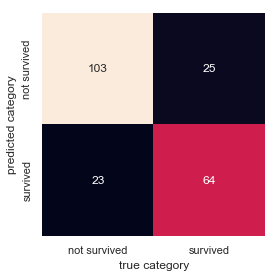

In [23]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

#Matplotlib is a Python visualization library
import matplotlib.pyplot as plt

#Set matplotlib visualization style
plt.style.use('classic')
# specifiy matplotlib graphs are shown "inline" in the ouput
%matplotlib inline

#Seabonr is  a Python data visualization library based on matplotlib
import seaborn as sns;sns.set()

# calculate the confusion matrix
mat = confusion_matrix(y_test,y_test2)

#rename data labels: 0 = not survived, 1 = survived
labels = ['not survived','survived']

#mat.T = transpose the matrix
# data labels (0,1) are sorted from left to right (for the horizontal axis)
# and from top to bottom (for the vertical axis)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category')
